**Import Libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import Input, Dense, Flatten,Conv2D ,MaxPooling2D ,Dropout
from keras.models import Model, Sequential
from keras import datasets, layers, models
from sklearn import metrics
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt

# Cifar10 Dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same", activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2, strides=(2, 2), padding="same", activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2, padding="same",  dilation_rate=2,activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 50s 31ms/step - loss: 1.7681 - accuracy: 0.3464 - val_loss: 1.5622 - val_accuracy: 0.4321
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5010 - accuracy: 0.4542 - val_loss: 1.4091 - val_accuracy: 0.4928
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3975 - accuracy: 0.4958 - val_loss: 1.2839 - val_accuracy: 0.5364
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.3340 - accuracy: 0.5182 - val_loss: 1.2020 - val_accuracy: 0.5726
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2916 - accuracy: 0.5326 - val_loss: 1.1809 - val_accuracy: 0.5812
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2558 - accuracy: 0.5460 - val_loss: 1.1940 - val_accuracy: 0.5723
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2249 - accuracy: 0.5568 - val_loss: 1.1549 - val_accura

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

313/313 - 3s - loss: 1.0870 - accuracy: 0.6121 - 3s/epoch - 9ms/step


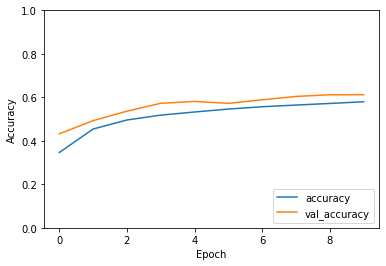

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)
print(test_loss)

0.6121000051498413
1.0870411396026611


Precision:  [0.61952555 0.72820993 0.41613588 0.44873341 0.63180516 0.49583333
 0.69667319 0.71121178 0.72772773 0.7591425 ]
Recall:  [0.679 0.777 0.588 0.372 0.441 0.595 0.712 0.628 0.727 0.602]


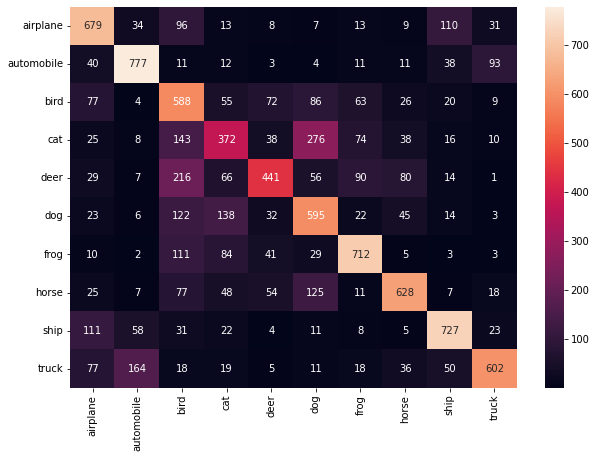

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions  = model.predict(test_images)
predictions_for_cm = predictions.argmax(1)
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
cm = confusion_matrix(test_labels,predictions_for_cm)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print('Precision: ',precision)
print('Recall: ',recall)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,  xticklabels=class_names, yticklabels = class_names,fmt='d')

In [ ]:
print('\n clasification report:\n', metrics.classification_report(test_labels,predictions_for_cm))


 clasification report:
               precision    recall  f1-score   support

           0       0.62      0.68      0.65      1000
           1       0.73      0.78      0.75      1000
           2       0.42      0.59      0.49      1000
           3       0.45      0.37      0.41      1000
           4       0.63      0.44      0.52      1000
           5       0.50      0.59      0.54      1000
           6       0.70      0.71      0.70      1000
           7       0.71      0.63      0.67      1000
           8       0.73      0.73      0.73      1000
           9       0.76      0.60      0.67      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.61      0.61     10000



In [ ]:
print("Accuracy:",test_acc)
print("Precision:", precision_score(test_labels, predictions_for_cm, average="macro"))
print("Recall:", recall_score(test_labels, predictions_for_cm, average="macro"))

Accuracy: 0.6121000051498413
Precision: 0.6234998460051218
Recall: 0.6121000000000001


# Fashion_Mnist Dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same", activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2, strides=(2, 2), padding="same", activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2, padding="same",  dilation_rate=2,activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 32s 17ms/step - loss: 0.8772 - accuracy: 0.6674 - val_loss: 0.5471 - val_accuracy: 0.7949
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.5997 - accuracy: 0.7791 - val_loss: 0.4935 - val_accuracy: 0.8166
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.5370 - accuracy: 0.8010 - val_loss: 0.4521 - val_accuracy: 0.8307
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5025 - accuracy: 0.8142 - val_loss: 0.4304 - val_accuracy: 0.8407
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4795 - accuracy: 0.8230 - val_loss: 0.4042 - val_accuracy: 0.8517
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4589 - accuracy: 0.8309 - val_loss: 0.3975 - val_accuracy: 0.8513
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.4422 - accuracy: 0.8372 - val_loss: 0.3894 - val_accura

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        80        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 32)          2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

313/313 - 2s - loss: 0.3691 - accuracy: 0.8649 - 2s/epoch - 6ms/step


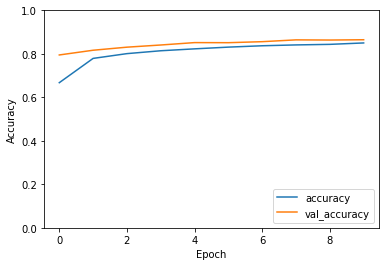

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)
print(test_loss)

0.8648999929428101
0.36907926201820374


Precision:  [0.79362101 0.99580273 0.73809524 0.89197531 0.77268094 0.97819315
 0.65281174 0.91834774 0.94762367 0.95295295]
Recall:  [0.846 0.949 0.868 0.867 0.758 0.942 0.534 0.956 0.977 0.952]


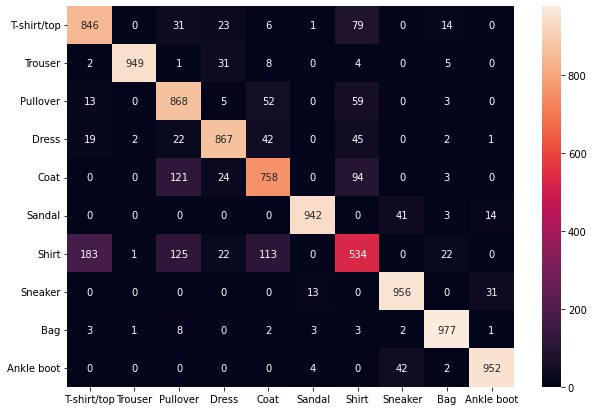

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions  = model.predict(test_images)
predictions_for_cm = predictions.argmax(1)
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
cm = confusion_matrix(test_labels,predictions_for_cm)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print('Precision: ',precision)
print('Recall: ',recall)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,  xticklabels=class_names, yticklabels = class_names,fmt='d')

In [ ]:
print('\n clasification report:\n', metrics.classification_report(test_labels,predictions_for_cm))


 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      1000
           1       1.00      0.95      0.97      1000
           2       0.74      0.87      0.80      1000
           3       0.89      0.87      0.88      1000
           4       0.77      0.76      0.77      1000
           5       0.98      0.94      0.96      1000
           6       0.65      0.53      0.59      1000
           7       0.92      0.96      0.94      1000
           8       0.95      0.98      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
print("Accuracy:",test_acc)
print("Precision:", precision_score(test_labels, predictions_for_cm, average="macro"))
print("Recall:", recall_score(test_labels, predictions_for_cm, average="macro"))

Accuracy: 0.8648999929428101
Precision: 0.8642104470125936
Recall: 0.8649000000000001
